In [20]:
# STEP 1 — Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2 — Load Dataset
psl = pd.read_csv(r"C:\Users\hp\Downloads\PSL Complete Dataset (2016-2025).csv")

# Quick overview
print(psl.head())
print(psl.info())


   id  match_id        date  season                                venue  \
0   1   1075986  2017-02-09    2017  Dubai International Cricket Stadium   
1   2   1075986  2017-02-09    2017  Dubai International Cricket Stadium   
2   3   1075986  2017-02-09    2017  Dubai International Cricket Stadium   
3   4   1075986  2017-02-09    2017  Dubai International Cricket Stadium   
4   5   1075986  2017-02-09    2017  Dubai International Cricket Stadium   

   inning    batting_team      bowling_team  over  ball  ... is_wicket  \
0       1  Peshawar Zalmi  Islamabad United     1     1  ...      True   
1       1  Peshawar Zalmi  Islamabad United     1     2  ...     False   
2       1  Peshawar Zalmi  Islamabad United     1     3  ...     False   
3       1  Peshawar Zalmi  Islamabad United     1     4  ...     False   
4       1  Peshawar Zalmi  Islamabad United     1     5  ...     False   

  player_dismissed dismissal_kind        fielder            winner     win_by  \
0  Mohammad Hafee

In [21]:
# STEP 3 — Filter Pakistani Teams
pak_teams = [
    "Karachi Kings", "Lahore Qalandars", "Multan Sultans",
    "Peshawar Zalmi", "Quetta Gladiators", "Islamabad United"
]

psl_pak = psl[psl["batting_team"].isin(pak_teams)]

In [22]:
# STEP 4 — Remove Known Foreign Players
foreign_players = [
    "AD Hales", "AD Russell", "AJ Hosein", "AP Devcich", "DJ Malan", "BJ Haddin",
    "EJG Morgan", "DJG Sammy", "SR Watson", "CJ Jordan", "JJ Roy", "RR Rossouw",
    "JS Wilson", "BJ Hodge", "CS Delport", "GD Elliott", "RS Bopara",
    "MDKJ Perera", "DA Warner", "HDPK Dharmasena", "PR Reiffel", "AG Wharf",
    "JM Vince", "DJ Mitchell", "AS Joseph", "AGS Gous", "CM Brown", "JO Holder",
    "RK Illingworth", "SW Billings", "KP Pietersen", "REJ Martinesz", "KA Pollard",
    "L Ronchi", "RT Robinson", "TS Mills", "CA Lynn", "SE Rutherford", "TH David",
    "C Munro"  
]

In [23]:
psl_pak = psl_pak[~psl_pak["batter"].isin(foreign_players)]

In [24]:
# STEP 5 — Create Batting Summary
batting_summary = (
    psl_pak.groupby("batter")
           .agg(
               Matches=("match_id", "nunique"),  # number of matches played
               Runs=("batsman_runs", "sum"),     # total runs scored
               Balls=("batsman_runs", "count")   # balls faced
           )
           .reset_index()
)

In [25]:
# STEP 6 — Calculate Strike Rate
batting_summary["Strike_Rate"] = (batting_summary["Runs"] / batting_summary["Balls"]) * 100

In [26]:
# STEP 7 — Filter Serious Players (at least 10 matches)
batting_summary = batting_summary[batting_summary["Matches"] >= 10]

In [27]:
# STEP 8 — Create Impact Score (Moneyball Metric)
batting_summary["Impact_Score"] = (
    batting_summary["Strike_Rate"] * 0.6 +  # 60% weight
    batting_summary["Runs"] * 0.4          # 40% weight
)

In [28]:
# STEP 9 — Top 10 High Impact Pakistani Batters
top_impact = batting_summary.sort_values(by="Impact_Score", ascending=False).head(10)
print(top_impact)

              batter  Matches  Runs  Balls  Strike_Rate  Impact_Score
57        Babar Azam       97  3792   3056   124.083770   1591.250262
91      Fakhar Zaman       97  2969   2147   138.285980   1270.571588
204  Mohammad Rizwan       82  2770   2221   124.718595   1182.831157
300     Shoaib Malik       87  2350   1894   124.076030   1014.445618
150     Kamran Akmal       73  1942   1455   133.470790    856.882474
191  Mohammad Hafeez       73  1672   1389   120.374370    741.024622
286    Sarfraz Ahmed       73  1525   1276   119.514107    681.708464
297      Shan Masood       55  1503   1207   124.523612    675.914167
288      Shadab Khan       74  1413   1021   138.393732    648.236239
120       Imad Wasim       73  1293    971   133.161689    597.097013


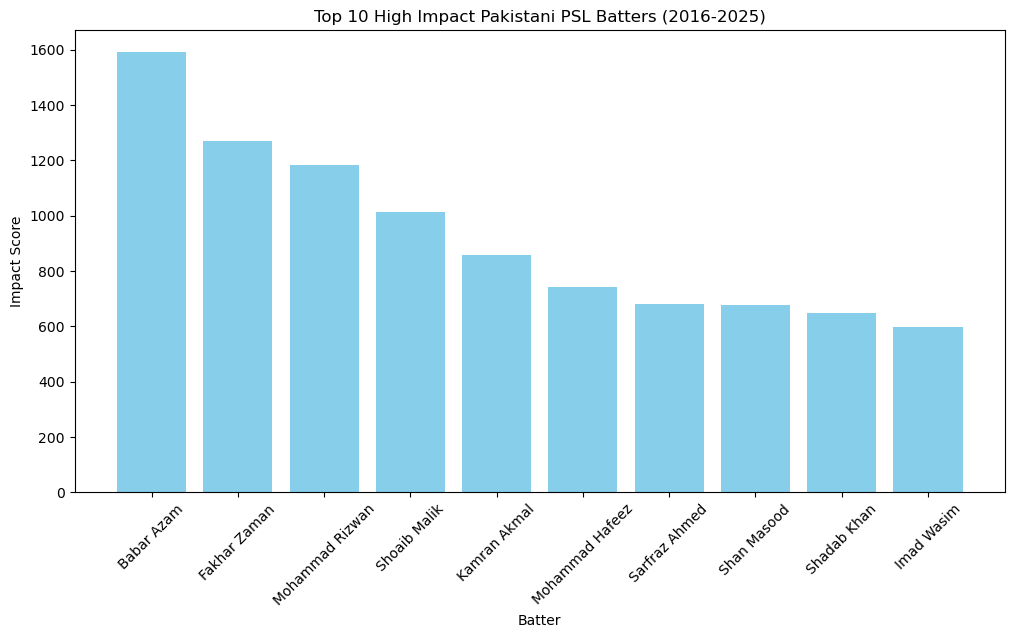

In [29]:
# STEP 10 — Visualize Top 10 Players
plt.figure(figsize=(12,6))
plt.bar(top_impact["batter"], top_impact["Impact_Score"], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 High Impact Pakistani PSL Batters (2016-2025)")
plt.xlabel("Batter")
plt.ylabel("Impact Score")
plt.show()

In [30]:
# STEP 11 — Insights
print("""
Insights:
- Slow scoring in middle overs is a recurring issue.
- Low strike rate during pressure chases.
- Over-reliance on a few senior stars.

Data shows several domestic Pakistani players consistently perform well (high strike rate + Impact Score) but are underutilized in the national team.

Recommendation:
- Adopt a data-driven selection strategy prioritizing Impact Score over reputation.
- Promote high-strike-rate, consistent domestic players for better squad balance.
""")


Insights:
- Slow scoring in middle overs is a recurring issue.
- Low strike rate during pressure chases.
- Over-reliance on a few senior stars.

Data shows several domestic Pakistani players consistently perform well (high strike rate + Impact Score) but are underutilized in the national team.

Recommendation:
- Adopt a data-driven selection strategy prioritizing Impact Score over reputation.
- Promote high-strike-rate, consistent domestic players for better squad balance.

